## TrpR_IAA

Exemplary design of the trpytophane repressor (TrpR: 1ZT9.pdb) with the ligand indole-3-acetic acid (IAA).

In [13]:
# This is a comment. It's marked by a leading "#" symbol

# Import OS and system libraries
import sys
import os

# Append the pocketoptimizer code to your $PYTHONPATH
cwd = os.getcwd()
sys.path.append(os.path.join(cwd, '..'))

# Import Pocketoptimizer
import pocketoptimizer as po

# Remove most warnings, only show Errors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [15]:
# Initialize a new design pipeline
design = po.DesignPipeline(work_dir=cwd, forcefield='amber_ff14SB', ph=7)

2022-06-14 15:31:17,551 - pocketoptimizer.ui - [INFO] - Logging to: /agh/projects/jakob/PycharmProjects/PocketOptimizer2/docs/tutorials/TrpR_IAA/pocketoptimizer.log


In [16]:
# Prepare ligand
design.parameterize_ligand(input_ligand='ligand/IAA.sdf')

2022-06-14 15:31:29,016 - pocketoptimizer.preparation.structure_building - [INFO] - Adding hydrogen atoms to the ligand according to pH: 7.
2022-06-14 15:31:30,457 - pocketoptimizer.preparation.structure_building - [INFO] - Parameterize ligand for GAFF2.
2022-06-14 15:31:30,720 - pocketoptimizer.preparation.structure_building - [INFO] - Ligand parametrization was successful.


In [17]:
design.prepare_protein(
    protein_structure='scaffold/1ZT9.pdb',  # Input PDB
    keep_chains=['A', 'B'],  # Specific protein chains to keep
    minimize=True,           # Protein minimization
    min_with_lig=True,       # Includes the ligand during the minimization
    backbone_restraint=True, # Restrains the backbone during the minimization
    cuda=True,               # Performs minimization on CPU instead of GPU
    discard_mols=[{'chain': 'A', 'resid': '1001'}]     # Special molecules to exclude. Per default everything, but peptides have to be defined manually
    )

2022-06-14 15:31:39,581 - pocketoptimizer.ui - [INFO] - Start Protein Preparation.
2022-06-14 15:31:39,585 - pocketoptimizer.preparation.structure_building - [INFO] - Starting protein preparation.
2022-06-14 15:31:39,819 - pocketoptimizer.preparation.structure_building - [INFO] - Protonate protein according to pH: 7.
2022-06-14 15:31:40,987 - moleculekit.tools.preparation - WARNING - Both chains and segments are defined in Molecule.chain / Molecule.segid, however they are inconsistent. Protein preparation will use the chain information.



---- Molecule chain report ----
Chain A:
    First residue: SER     5  
    Final residue: LEU   105  
Chain B:
    First residue: SER     5  
    Final residue: TRP   901  
---- End of chain report ----



2022-06-14 15:31:43,270 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 A to HID
2022-06-14 15:31:43,271 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 A to HID
2022-06-14 15:31:43,271 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 B to HID
2022-06-14 15:31:43,272 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 B to HID
2022-06-14 15:31:43,274 - moleculekit.tools.preparation - WARNING - Dubious protonation state: the pKa of 2 residues is within 1.0 units of pH 7.0.
2022-06-14 15:31:43,275 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 A (pKa= 6.16)
2022-06-14 15:31:43,275 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 B (pKa= 6.24)
2022-06-14 15:31:46,396 - pocketoptimizer.preparation.structure_building - [INFO] - Successfully prepared protein.
2022-06-14 15:31:46,397 - pocketoptimizer.ui - [INFO] - Minimize protein with ligand insi

In [18]:
design.prepare_lig_conformers(
    nconfs=50,         # Maximum number of conformers to produce'
    method='genetic',  # Genetic method in OpenBabel, other option is confab
    score='rmsd',      # Filters conformers based on RMSD
    )

2022-06-14 15:31:57,661 - pocketoptimizer.preparation.conformer_generator_obabel - [INFO] - Starting ligand conformer generation using obabel.
2022-06-14 15:31:57,662 - pocketoptimizer.preparation.conformer_generator_obabel - [INFO] - Selected Method: genetic.
2022-06-14 15:31:58,396 - pocketoptimizer.preparation.conformer_generator_obabel - [INFO] - Generated 50 conformers.
2022-06-14 15:31:58,397 - pocketoptimizer.preparation.conformer_generator_obabel - [INFO] - Conformer sampling was successful.


In [19]:

# Your mutations
design.set_mutations([{'mutations': ['LEU', 'THR'], 'resid': '88', 'chain': 'B'}, 
                      {'mutations': ['ARG'], 'resid': '84', 'chain': 'B'}, 
                      {'mutations': ['LEU','THR'], 'resid': '44', 'chain': 'A'}]
)


2022-06-14 15:31:58,404 - pocketoptimizer.ui - [INFO] - If design positions are removed or added a new design run should be started.


In [20]:
# Prepares all defined mutants and glycine scaffolds for side chain rotamer and ligand pose sampling
design.prepare_mutants(sampling_pocket='GLY')

2022-06-14 15:31:58,989 - pocketoptimizer.ui - [INFO] - Start building mutated protein scaffold variants.
2022-06-14 15:31:58,990 - pocketoptimizer.ui - [INFO] - Build GLY sampling pockets.
2022-06-14 15:31:59,687 - pocketoptimizer.preparation.structure_building - [INFO] - Build ligand sampling pocket.
2022-06-14 15:32:00,184 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-06-14 15:32:00,359 - pocketoptimizer.preparation.structure_building - [INFO] - Starting to build.
2022-06-14 15:32:00,687 - pocketoptimizer.preparation.structure_building - [INFO] - Finished building.
2022-06-14 15:32:02,175 - pocketoptimizer.preparation.structure_building - [INFO] - Build scaffold A_44_LEU.
2022-06-14 15:32:02,532 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-06-14 15:32:02,688 - pocketoptimizer.preparation.structure_building - [INFO] - Starting to build.
2022-06-14 15:32:02,984 - pocketoptimizer.preparation.structure_building - [INFO] - Finished building.
2022-06-14 15

In [21]:
ncpus = 8
# Sampling of side chain rotamers
design.sample_sidechain_rotamers(
    vdw_filter_thresh=100,   # Energy threshold of 100 kcal/mol
    ncpus=ncpus,             # Number of CPUs to use
    library='dunbrack'       # Use dunbrack rotamer library
    )

2022-06-14 15:32:49,871 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Start rotamer sampling procedure using FFEvaluate.
2022-06-14 15:32:49,872 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Using 8 CPU's for multiprocessing.
2022-06-14 15:32:50,637 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Rotamers for residue: A_44_LEU not sampled yet.


A_44_LEU:   0%|          | 0/82 [00:00<?, ?it/s]

2022-06-14 15:33:00,849 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Writing 27/82 rotamers within energy threshold of 100 kcal/mol for LEU at position: A_44.
2022-06-14 15:33:00,865 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Rotamers for residue: A_44_THR not sampled yet.


A_44_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-06-14 15:33:08,574 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Writing 5/10 rotamers within energy threshold of 100 kcal/mol for THR at position: A_44.
2022-06-14 15:33:08,582 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Rotamers for residue: B_84_ARG not sampled yet.


B_84_ARG:   0%|          | 0/676 [00:00<?, ?it/s]

2022-06-14 15:33:42,722 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Writing 392/676 rotamers within energy threshold of 100 kcal/mol for ARG at position: B_84.
2022-06-14 15:33:42,783 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Rotamers for residue: B_88_LEU not sampled yet.


B_88_LEU:   0%|          | 0/82 [00:00<?, ?it/s]

2022-06-14 15:33:52,504 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Writing 27/82 rotamers within energy threshold of 100 kcal/mol for LEU at position: B_88.
2022-06-14 15:33:52,516 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Rotamers for residue: B_88_THR not sampled yet.


B_88_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-06-14 15:34:00,357 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Writing 7/10 rotamers within energy threshold of 100 kcal/mol for THR at position: B_88.
2022-06-14 15:34:00,365 - pocketoptimizer.sampling.sidechain_rotamers_ffev - [INFO] - Rotamer sampling procedure is finished.


In [22]:
# Sampling of ligand poses
# Defines a grid in which the ligand is translated and rotated along.
#                       Range, Steps
sample_grid = {'trans': [1, 0.5],  # Angstrom
               'rot': [20, 20]}    # Degree
design.sample_lig_poses(
    method='grid',         #  Uses the grid method. Other option is random
    grid=sample_grid,      #  Defined grid for sampling    
    vdw_filter_thresh=100, #  Energy threshold of 100 kcal/mol
    ncpus=ncpus,           #  Number of CPUs to use
    max_poses=10000        #  Maximum number of poses
)

2022-06-14 15:34:00,511 - pocketoptimizer.ui - [INFO] - Sample ligand poses.
2022-06-14 15:34:00,513 - pocketoptimizer.sampling.ligand_poses - [INFO] - Start ligand pose sampling procedure.
2022-06-14 15:34:01,995 - pocketoptimizer.sampling.ligand_poses - [INFO] - Sample possible poses within the defined grid.


Ligand Conformers:   0%|          | 0/51 [00:00<?, ?it/s]

2022-06-14 15:34:02,070 - pocketoptimizer.sampling.ligand_poses - [INFO] - Created possible 4641 poses.
2022-06-14 15:34:02,071 - pocketoptimizer.sampling.ligand_poses - [INFO] - Start filtering poses.
2022-06-14 15:34:02,071 - pocketoptimizer.sampling.ligand_poses - [INFO] - Using 8 CPUs for multiprocessing.


Filter Poses:   0%|          | 0/4641 [00:00<?, ?it/s]

2022-06-14 15:36:37,085 - pocketoptimizer.sampling.ligand_poses - [INFO] - Calculated poses within threshold: 1230.
2022-06-14 15:36:37,159 - pocketoptimizer.sampling.ligand_poses - [INFO] - Pose sampling procedure was successful.


In [24]:
design.calculate_energies(
    scoring='vina',           #  Method to score protein-ligand interaction
    ncpus=ncpus,              #  Number of CPUs to use
)

2022-06-14 15:37:09,659 - pocketoptimizer.ui - [INFO] - Start energy calculation.
2022-06-14 15:37:09,660 - pocketoptimizer.ui - [INFO] - Using 8 CPUs for multiprocessing.
2022-06-14 15:37:09,661 - pocketoptimizer.ui - [INFO] - Calculate Sidechain-Scaffold Energies.
2022-06-14 15:37:09,661 - pocketoptimizer.scoring.sidechain_scaffold_energies - [INFO] - Compute energies using forcefield: amber_ff14SB.
2022-06-14 15:37:09,745 - pocketoptimizer.scoring.sidechain_scaffold_energies - [INFO] - Sidechain-Scaffold-Interaction-Energies for Residue: A_44_LEU not computed yet.


  0%|          | 0/27 [00:00<?, ?it/s]

2022-06-14 15:37:17,839 - pocketoptimizer.scoring.sidechain_scaffold_energies - [INFO] - Sidechain-Scaffold-Interaction-Energies for Residue: A_44_THR not computed yet.


  0%|          | 0/5 [00:00<?, ?it/s]

2022-06-14 15:37:25,228 - pocketoptimizer.scoring.sidechain_scaffold_energies - [INFO] - Sidechain-Scaffold-Interaction-Energies for Residue: B_84_ARG not computed yet.


  0%|          | 0/392 [00:00<?, ?it/s]

2022-06-14 15:37:43,507 - pocketoptimizer.scoring.sidechain_scaffold_energies - [INFO] - Sidechain-Scaffold-Interaction-Energies for Residue: B_88_LEU not computed yet.


  0%|          | 0/27 [00:00<?, ?it/s]

2022-06-14 15:37:51,148 - pocketoptimizer.scoring.sidechain_scaffold_energies - [INFO] - Sidechain-Scaffold-Interaction-Energies for Residue: B_88_THR not computed yet.


  0%|          | 0/7 [00:00<?, ?it/s]

2022-06-14 15:37:58,355 - pocketoptimizer.scoring.sidechain_scaffold_energies - [INFO] - Sidechain-Scaffold calculation was successful.
2022-06-14 15:37:58,356 - pocketoptimizer.ui - [INFO] - Calculate Sidechain-Pair Energies.
2022-06-14 15:37:58,357 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Compute energies using forcefield: amber_ff14SB.
2022-06-14 15:37:59,021 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Sidechain-Sidechain-Interaction-Energies for Residue-Pair: A_44_LEU/B_84_ARG not computed yet.


  0%|          | 0/10584 [00:00<?, ?it/s]

2022-06-14 15:41:16,810 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Sidechain-Sidechain-Interaction-Energies for Residue-Pair: A_44_THR/B_84_ARG not computed yet.


  0%|          | 0/1960 [00:00<?, ?it/s]

2022-06-14 15:41:55,200 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Sidechain-Sidechain-Interaction-Energies for Residue-Pair: A_44_LEU/B_88_LEU not computed yet.


  0%|          | 0/729 [00:00<?, ?it/s]

2022-06-14 15:42:15,539 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Sidechain-Sidechain-Interaction-Energies for Residue-Pair: A_44_LEU/B_88_THR not computed yet.


  0%|          | 0/189 [00:00<?, ?it/s]

2022-06-14 15:42:25,815 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Sidechain-Sidechain-Interaction-Energies for Residue-Pair: A_44_THR/B_88_LEU not computed yet.


  0%|          | 0/135 [00:00<?, ?it/s]

2022-06-14 15:42:35,076 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Sidechain-Sidechain-Interaction-Energies for Residue-Pair: A_44_THR/B_88_THR not computed yet.


  0%|          | 0/35 [00:00<?, ?it/s]

2022-06-14 15:42:43,477 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Sidechain-Sidechain-Interaction-Energies for Residue-Pair: B_84_ARG/B_88_LEU not computed yet.


  0%|          | 0/10584 [00:00<?, ?it/s]

2022-06-14 15:46:03,089 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Sidechain-Sidechain-Interaction-Energies for Residue-Pair: B_84_ARG/B_88_THR not computed yet.


  0%|          | 0/2744 [00:00<?, ?it/s]

2022-06-14 15:46:52,956 - pocketoptimizer.scoring.sidechain_pair_energies - [INFO] - Sidechain-Pair calculation was successful.
2022-06-14 15:46:52,958 - pocketoptimizer.ui - [INFO] - Calculate Ligand-Scaffold/Sidechain-Interaction-Energies.
2022-06-14 15:46:52,958 - pocketoptimizer.scoring.smina_scorer - [INFO] - Score ligand interactions using vina.
2022-06-14 15:46:54,501 - pocketoptimizer.scoring.smina_scorer - [INFO] - Ligand-Scaffold-Interaction-Energies not computed yet.
2022-06-14 15:46:54,502 - pocketoptimizer.scoring.smina_scorer - [INFO] - Prepare fixed scaffold.


Ligand/Scaffold:   0%|          | 0/1 [00:00<?, ?it/s]

2022-06-14 15:46:57,427 - pocketoptimizer.scoring.smina_scorer - [INFO] - Ligand-Sidechain-Interaction-Energies with Residue: A_44_LEU not computed yet.
2022-06-14 15:46:57,555 - pocketoptimizer.scoring.smina_scorer - [INFO] - Loop over Rotamers of Residue: A_44_LEU.


Ligand/A_44_LEU:   0%|          | 0/27 [00:00<?, ?it/s]

2022-06-14 15:47:23,990 - pocketoptimizer.scoring.smina_scorer - [INFO] - Ligand-Sidechain-Interaction-Energies with Residue: A_44_THR not computed yet.
2022-06-14 15:47:24,028 - pocketoptimizer.scoring.smina_scorer - [INFO] - Loop over Rotamers of Residue: A_44_THR.


Ligand/A_44_THR:   0%|          | 0/5 [00:00<?, ?it/s]

2022-06-14 15:47:29,102 - pocketoptimizer.scoring.smina_scorer - [INFO] - Ligand-Sidechain-Interaction-Energies with Residue: B_84_ARG not computed yet.
2022-06-14 15:47:30,040 - pocketoptimizer.scoring.smina_scorer - [INFO] - Loop over Rotamers of Residue: B_84_ARG.


Ligand/B_84_ARG:   0%|          | 0/392 [00:00<?, ?it/s]

2022-06-14 15:53:57,407 - pocketoptimizer.scoring.smina_scorer - [INFO] - Ligand-Sidechain-Interaction-Energies with Residue: B_88_LEU not computed yet.
2022-06-14 15:53:57,570 - pocketoptimizer.scoring.smina_scorer - [INFO] - Loop over Rotamers of Residue: B_88_LEU.


Ligand/B_88_LEU:   0%|          | 0/27 [00:00<?, ?it/s]

2022-06-14 15:54:24,437 - pocketoptimizer.scoring.smina_scorer - [INFO] - Ligand-Sidechain-Interaction-Energies with Residue: B_88_THR not computed yet.
2022-06-14 15:54:24,482 - pocketoptimizer.scoring.smina_scorer - [INFO] - Loop over Rotamers of Residue: B_88_THR.


Ligand/B_88_THR:   0%|          | 0/7 [00:00<?, ?it/s]

2022-06-14 15:54:31,496 - pocketoptimizer.scoring.smina_scorer - [INFO] - Ligand scoring was successful.
2022-06-14 15:54:31,497 - pocketoptimizer.ui - [INFO] - Energy calculation was successful.


2022-06-14 15:54:35,969 - pocketoptimizer.solving.sontag_solver - [INFO] - Calculating Solutions.


Solutions:   0%|          | 0/10 [00:00<?, ?it/s]

2022-06-14 15:55:32,500 - pocketoptimizer.ui - [INFO] - Parse calculated solutions.
2022-06-14 15:55:33,004 - pocketoptimizer.ui - [INFO] - Read 10 solutions from solver output.
2022-06-14 15:55:37,663 - pocketoptimizer.ui - [INFO] - Write txt report.
2022-06-14 15:55:37,714 - pocketoptimizer.ui - [INFO] - Wrote solution report text file(s).
2022-06-14 15:55:37,717 - pocketoptimizer.ui - [INFO] - Wrote summary text file.
2022-06-14 15:55:37,717 - pocketoptimizer.ui - [INFO] - Write html report.
2022-06-14 15:55:37,797 - pocketoptimizer.ui - [INFO] - Wrote solution report html file(s).
2022-06-14 15:55:37,799 - pocketoptimizer.design.html_reporter - [INFO] - Create energy plot.
2022-06-14 15:55:39,579 - pocketoptimizer.design.html_reporter - [INFO] - Create sequence logo for mutable positions.


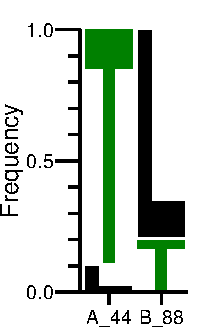

2022-06-14 15:55:41,399 - pocketoptimizer.ui - [INFO] - Wrote summary html file.
2022-06-14 15:55:41,399 - pocketoptimizer.ui - [INFO] - Creating design structure files.
2022-06-14 15:55:41,400 - pocketoptimizer.ui - [INFO] - Create Structures.
2022-06-14 15:55:50,838 - pocketoptimizer.ui - [INFO] - Creating pymol scripts.
2022-06-14 15:55:50,855 - pocketoptimizer.ui - [INFO] - All solutions are processed.
2022-06-14 15:55:50,856 - pocketoptimizer.ui - [INFO] - 10 best design solution(s) for design with forcefield: amber_ff14SB, scoring method: vina and ligand scaling: 20 identified.


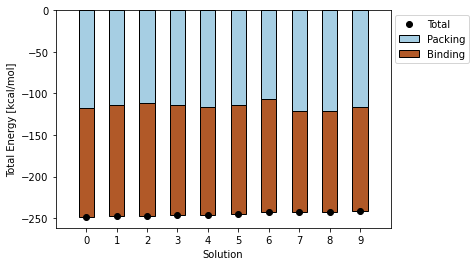

In [25]:
# Compute the lowest energy structures using linear programming
design.design(
    num_solutions=10,           #  Number of solutions to compute
    ligand_scaling=20,          #  Scaling factor for binding-related energies
)

In [7]:
# Do not run this unless you wanna fully clean your working directory from all created files and folders

design.clean(scaffold=True, ligand=True)

2021-11-02 15:02:48,273 - pocketoptimizer.ui - [INFO] - All scaffold files are deleted.
2021-11-02 15:02:48,305 - pocketoptimizer.ui - [INFO] - All ligand files are deleted.
2021-11-02 15:02:48,310 - pocketoptimizer.ui - [INFO] - Deleted settings file.
2021-11-02 15:02:48,313 - pocketoptimizer.ui - [INFO] - Deleted log file.
2021-11-02 15:02:48,314 - pocketoptimizer.ui - [INFO] - Initialize new DesignPipeline object.
2021-11-02 15:02:48,315 - pocketoptimizer.ui - [INFO] - All files were deleted.
